# **Library Book Recommendation System**
---
Authors: [Monicah Iwagit](https://github.com/Okodoimonicah), [Bradley Azegele](https://github.com/Azegele), [Emmanuel Kipkorir](), [Belinda Nyamai](), [Femi Kamau](https://github.com/ctrl-Karugu), and [Dennis Kimiri]()

## 1. Business Understanding

### 1.1 Problem Statement
>The tremendous growth and usage of information has led to information overloading where users find it difficult to locate the right information at a specified time. Although there are previous studies conducted on library recommender systems, the datasets used were small compared to the dataset we intend to use hence minimal area coverage. Recommending the right library books is a challenge due to the variety of genres available and the huge collection of books provided. A user finds it difficult to select the most appropriate book that will suit their academic needs, this process consumes a lot of time that the user would have used to sharpen on their desired skills. Additionally, many books in the library are rarely utilized which results in a waste of library resources. Having a personalized recommendation system seeks to predict the preference based on the user’s interest, behavior and information. The application of recommender systems in the university library solves the problem of difficulty in choosing books and improves utilization rate of library resources. 

## 2. Data Understanding
> The goal of the Data Understanding phase is to provide a solid foundation for the subsequent steps, including data preparation, exploratory data analysis, model development, and evaluation.

#### Load Libraries

In [181]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### 2.1 Collect Initial Data
> The goal of this section is to acquire the necessary data and load it into the notebook.

> The data used in this project was sourced from 2 different sources:
>   1. The first was source was from Cai-Nicolas Ziegler in a 4-week crawl (August-September [2004]) in the University of Freiburg, Germany. This can be found [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). The data obtained are 3 datasets with information on [users](./data/BX-Users.csv), [ratings](./data/BX-Book-Ratings.csv) and [books](./data/BX-Books.csv) from a library.
>
>   2. The second set of data was sourced from the [Google Books API](https://developers.google.com/books). This data was obtained by using ISBNs in the books dataset from the first source. The script used to extract the data can be found [here](./make_dataset.py). This data was then stored in csv format and can be found [here](./data/books.csv).

#### Load Data

In [182]:
# (Source 1)
ratings = pd.read_csv("data/BX-Book-Ratings.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books = pd.read_csv("data/BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
users = pd.read_csv("data/BX-Users.csv", sep=";", error_bad_lines=False, encoding="latin-1")

# (Source 2)
books_extra = pd.read_csv("data/books.csv", encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### 2.2 Describe Data
> The goal of this section is to examine the data and document its surface properties.

In [183]:
# Define class to describe the data 
class DescribeData():
    """This class is used to describe the data in a DataFrame."""
    
    def __init__(self, df) -> None:
        
        # Get the DataFrame
        self.df = df
        
        # Get the datatypes of the columns in the DataFrame
        self.datatypes = df.dtypes
         
        # Get the shape of the DataFrame
        self.shape = f"The shape of the DataFrame is {df.shape}\n\nRecords: {df.shape[0]}\nColumns: {df.shape[1]}"
        
        # Get the number of missing values in each column
        self.missing = f"There are a total of {df.isnull().sum().values.sum()} missing values in the DataFrame.\n\n{df.isnull().sum()}"
        
        # Get the number of duplicate rows
        self.duplicates = f"There are {df.duplicated().sum()} duplicated records in the DataFrame."

#### 2.2.1 `ratings`

In [184]:
# Create an instance of the 'DescribeData' class for the 'ratings' DataFrame
rt = DescribeData(ratings)

In [185]:
# Preview the 'ratings' DataFrame
rt.df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [186]:
# Inspect the information about the DataFrame
rt.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [187]:
# Inspect the shape of the DataFrame
print(rt.shape)

The shape of the DataFrame is (1149780, 3)

Records: 1149780
Columns: 3


In [188]:
# Inspect the datatypes of the columns in the DataFrame
print(rt.datatypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [189]:
# Inspect the summary statistics of the DataFrame
rt.df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [190]:
# Inspect the number of missing values in each column
print(rt.missing)

There are a total of 0 missing values in the DataFrame.

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [191]:
# Inspect the duplicates in the DataFrame
print(rt.duplicates)

There are 0 duplicated records in the DataFrame.


[**Ratings Dataset**](./data/BX-Book-Ratings.csv)

>* Spans **3** columns and **1,149,780** rows.

>* Contains **2** unique datatypes: 
>    * **int64**
>    * **object**

>* Has no missing values

>* Has no duplicates

#### 2.2.2 `books` 

In [192]:
# Instantiate the 'DescribeData' class for the 'books' DataFrame
bk = DescribeData(books)

In [193]:
# Preview the 'books' DataFrame
bk.df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [194]:
# Inspect the information about the DataFrame
bk.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [195]:
# Inspect the shape of the DataFrame
print(bk.shape)

The shape of the DataFrame is (271360, 8)

Records: 271360
Columns: 8


In [196]:
# Inspect the datatypes of the columns in the DataFrame
print(bk.datatypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [197]:
# Inspect the missing values in the DataFrame
print(bk.missing)

There are a total of 6 missing values in the DataFrame.

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [198]:
# Inspect the duplicates in the DataFrame
print(bk.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books Dataset**](./data/BX-Books.csv)

>* Spans **8** columns and **271,359** rows.

>* Contains 1 unique datatype: 
>   * **object**

>* Has **6** missing values:
>   * Book-Author: **1** 
>   * Publisher: **2**
>   * Image-URL-L: **3**

>* Has no duplicates

#### 2.2.3 `users` 

In [199]:
# Instantiate the 'DescribeData' class for the 'users' DataFrame
ur = DescribeData(users)

In [200]:
# Preview the 'users' DataFrame
ur.df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [201]:
# Inspect the information about the DataFrame
ur.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [202]:
# Inspect the shape of the DataFrame
print(ur.shape)

The shape of the DataFrame is (278858, 3)

Records: 278858
Columns: 3


In [203]:
# Inspect the datatypes of the columns in the DataFrame
print(ur.datatypes)

User-ID       int64
Location     object
Age         float64
dtype: object


In [204]:
# Inspect the summary statistics of the DataFrame
ur.df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [205]:
# Inspect the missing values in the DataFrame
print(ur.missing)

There are a total of 110762 missing values in the DataFrame.

User-ID          0
Location         0
Age         110762
dtype: int64


In [206]:
# Inspect the duplicates in the DataFrame
print(ur.duplicates)

There are 0 duplicated records in the DataFrame.


[**Users Dataset**](./data/BX-Users.csv)

>* Spans **3** columns and **278,857** rows.

>* Contains **3** unique datatypes:
>   * **int64**
>   * **float64**
>   * **object**

>* Has **110762** missing values:
>   * Age: **110,762**

>* Has no duplicates

#### 2.2.4 `books_extra`

In [207]:
# Instantiate the 'DescribeData' class for the 'books_extra' DataFrame
bk_extra = DescribeData(books_extra)

In [208]:
# Preview the 'books_extra' DataFrame
bk_extra.df.head()

,authors,published_date,description,isbn_10,isbn_13,page_count,categories,maturity_rating,language,join_isbn_10
0,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",0195153448,9780195153446.0,808.0,['Social Science'],NOT_MATURE,en,0195153448
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0002005018
2,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",IND:30000026059836,NaN,582.0,['1940-1949'],NOT_MATURE,en,0060973129
3,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",9780374157067,374157065.0,367.0,['Medical'],NOT_MATURE,en,0374157065
4,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",0393045218,9780393045215.0,240.0,['Design'],NOT_MATURE,en,0393045218


In [209]:
# Inspect the information about the DataFrame
bk_extra.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266401 entries, 0 to 266400
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   authors          200900 non-null  object 
 1   published_date   202728 non-null  object 
 2   description      171784 non-null  object 
 3   isbn_10          202788 non-null  object 
 4   isbn_13          171364 non-null  object 
 5   page_count       201597 non-null  float64
 6   categories       189620 non-null  object 
 7   maturity_rating  202848 non-null  object 
 8   language         202848 non-null  object 
 9   join_isbn_10     266400 non-null  object 
dtypes: float64(1), object(9)
memory usage: 20.3+ MB


In [210]:
# Inspect the shape of the DataFrame
print(bk_extra.shape)

The shape of the DataFrame is (266401, 10)

Records: 266401
Columns: 10


In [211]:
# Inspect the datatypes of the columns in the DataFrame
print(bk_extra.datatypes)

authors             object
published_date      object
description         object
isbn_10             object
isbn_13             object
page_count         float64
categories          object
maturity_rating     object
language            object
join_isbn_10        object
dtype: object


In [212]:
# Inspect the summary statistics of the DataFrame
bk_extra.df.describe()

,page_count
count,201597.000000
mean,279.266581
std,179.229782
min,0.000000
25%,176.000000
50%,260.000000
75%,356.000000
max,3596.000000


In [213]:
# Inspect the missing values in the DataFrame
print(bk_extra.missing)

There are a total of 651133 missing values in the DataFrame.

authors            65501
published_date     63673
description        94617
isbn_10            63613
isbn_13            95037
page_count         64804
categories         76781
maturity_rating    63553
language           63553
join_isbn_10           1
dtype: int64


In [214]:
# Inspect the duplicates in the DataFrame
print(bk_extra.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books (Extra) Dataset**](./data/books.csv)

>* Spans **10** columns and **()** rows.

>* Contains **2** unique datatypes:
>   * **float64**
>   * **object**

>* Has **()** missing values:

>* Has no duplicates

## 3. Data Preparation
> Is the process of identifying and correcting or removing incorrect, incomplete, or improperly formatted data in a dataset.
This involves handling missing values, fixing incorrect data, removing duplicates, normalizing data and handling outliers.

In [215]:
# class for droping columns that are not needed

class drop_column:
    def __init__(self, data):
        self.data = data

    def drop_columns(self, columns):
        self.data = self.data.drop(columns, axis=1)
        return self.data

In [216]:
# droping image-urls from the books dataset

drop = drop_column(books)
books = drop.drop_columns(['Image-URL-M', 'Image-URL-L'])
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg


In [229]:
books['ISBN'] = books['ISBN'].astype(str).str.upper().str.replace(' ', '')

In [230]:
books['ISBN'].shape

(271360,)

In [231]:
books['ISBN'].isna().sum()

0

> Merge **books** and **extra_books** datasets

In [217]:
# merging the books dataset and books_extra dataset

books_data = books.merge(books_extra, left_on='ISBN', right_on='join_isbn_10', how='inner')
books_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259172 entries, 0 to 259171
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 259172 non-null  object 
 1   Book-Title           259172 non-null  object 
 2   Book-Author          259171 non-null  object 
 3   Year-Of-Publication  259172 non-null  object 
 4   Publisher            259170 non-null  object 
 5   Image-URL-S          259172 non-null  object 
 6   authors              200899 non-null  object 
 7   published_date       202727 non-null  object 
 8   description          171783 non-null  object 
 9   isbn_10              202788 non-null  object 
 10  isbn_13              171364 non-null  object 
 11  page_count           201597 non-null  float64
 12  categories           189620 non-null  object 
 13  maturity_rating      202848 non-null  object 
 14  language             202848 non-null  object 
 15  join_isbn_10     

In [218]:
# data understanding of the new dataset
bd = DescribeData(books_data)

In [219]:
# inspecting shape of the dataframe
print(bd.shape)

The shape of the DataFrame is (259172, 16)

Records: 259172
Columns: 16


In [220]:
# Inspect the duplicates in the DataFrame
print(bd.duplicates)

There are 0 duplicated records in the DataFrame.


In [221]:
# Inspect the missing values in the DataFrame
print(bd.missing)

There are a total of 586077 missing values in the DataFrame.

ISBN                       0
Book-Title                 0
Book-Author                1
Year-Of-Publication        0
Publisher                  2
Image-URL-S                0
authors                58273
published_date         56445
description            87389
isbn_10                56384
isbn_13                87808
page_count             57575
categories             69552
maturity_rating        56324
language               56324
join_isbn_10               0
dtype: int64


#### 3.1 ratings

In [222]:
# function to check if all entries in the column are integers

def check_int(df, column_name):
    
    if df[column_name].apply(lambda x: isinstance(x, int)).all():
    
    
      print("All entries in the column are integers.")
    
    else:
        
        print("Not all entries in the column are integers.")

In [223]:
# if entries in book-rating column are integers

check_int(ratings, 'Book-Rating')

All entries in the column are integers.


In [224]:
# if entries in user-id column are integers

check_int(ratings, 'User-ID')

All entries in the column are integers.


In [225]:
# checking whether any of the values in the ISBN column of the ratings dataframe contain any characters 
# that are not alphabetical or numerical.

import  re 


# Define a regular expression to match non-alphanumeric characters
reg = "[^A-Za-z0-9]"

# Initialize a flag variable
flag = 0

# Loop through each value in the ISBN column
for x in ratings['ISBN']:
  # Check if the value contains any non-alphanumeric characters
  if re.search(reg, x):
    # If any are found, set the flag variable to 1
    flag = 1
    break

# Check the value of the flag variable
if flag == 1:
    print("There are non-alphanumeric characters in the ISBN column.")
else:
    print("There are no non-alphanumeric characters in the ISBN column.")    

There are non-alphanumeric characters in the ISBN column.


In [226]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [227]:
ratings.shape

(1149780, 3)

In [228]:
# Convert the elements in the 'ISBN' column to uppercase and remove any spaces
ratings['ISBN'] = ratings['ISBN'].astype(str).str.upper().str.replace(' ', '')

#### 3.2 Users Dataset

> The location column has city, state and country separated by commas. We segregate these into 3 different columns so that we can analyse on the basis of the country of different users


In [46]:
#splitting a string into a list
list_ = users.Location.str.split(', ')

#empty lists to add values  
city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0
#generating a for loop to add values to the empty lists
for i in range(0,len(list_)):
    #removing invalid entries in city
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        #removing invalid entries in state
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            #removing invalid entries in country
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
#dropping the location column from users             
users = users.drop('Location',axis=1)

#handling cases where city/state from the lists is already given
temp = []
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])
    
#creating a dataframe for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#adding the new dataframes to the original users dataframe 
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

#printing the number of countries that do not have values 
print(count_no_country)

#printing the states which didnt have any values
print(count_no_state)     

4659
16044


In [47]:
# preview users

users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [48]:
# unique values in age 
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [49]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [50]:
#confirming that the new dataframes have been added to users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [51]:
users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


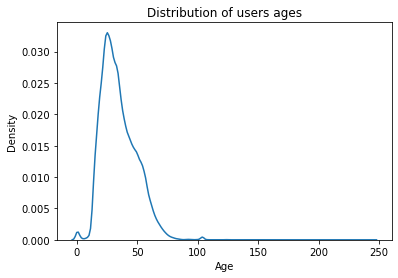

In [52]:
# Create a density plot to show the distribution of ages
sns.kdeplot(users['Age'])

# Add a title and labels to the x and y axes
plt.title('Distribution of users ages')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Outliers present in the Age column')

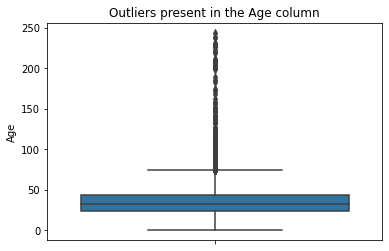

In [53]:
#checking for outliers in the age column using a boxplot
sns.boxplot(y='Age', data=users)
plt.title('Outliers present in the Age column')

> For our book recommendation system, users with ages less than 10 and above 80 are not the appropriate target for our system and we assume that they will not be able to access a library or use the recommendation system.

> Looking at the distribution plot the age is skewed to the right and has outliers. Replacing the missing age values and values less than 10 and greater than 80 witih the median will be the robust approach since it's not sensitive to extreme values compared to using the mean. 

In [54]:
# checking for null values
users['Age'].isnull().sum()

110762

In [55]:
# Select rows where the age column is greater than 10 and less than 80
users_filtered = users[(users['Age'] > 10) & (users['Age'] < 80)]

In [56]:
# find the median
median = users_filtered['Age'].median()
median

32.0

In [57]:
# Replace the entries less than 10 or greater than 80 with the median
users.loc[(users['Age'] < 10) | (users['Age'] > 80), 'Age'] = median

In [58]:
# Replace missing values in the "age" column with the median age
users['Age'] = users['Age'].fillna(median)

In [59]:
# convert the age column to int
users['Age'] = pd.to_numeric(users['Age'], downcast='integer')

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int8  
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(1), int8(1), object(3)
memory usage: 8.8+ MB


#### 3.3  **books_data** (merged books and extra_books)

In [61]:
# define class for data cleaning
class DataCleaning:
    def __init__(self, data):
        self.data = data
        
    def drop_null_rows(self):
        """Drops rows with null values."""
        self.data = self.data.dropna()
        return self.data

    def drop_duplicate_rows(self):
        """Drops duplicate rows."""
        self.data = self.data.drop_duplicates()
        return self.data

    def handle_missing_values(self, column, method, value=None):
        """Handles missing values in a specified column.
        
        The method parameter take one of the following:
        "drop": Drops rows with missing values in the specified column.
        "fill": Fills missing values with the specified value.
        "interpolate": Interpolates missing values using linear interpolation.
        """
        if method == "drop":
            self.data = self.data.dropna(subset=[column])
        elif method == "fill":
            self.data[column] = self.data[column].fillna(value)
        elif method == "interpolate":
            self.data[column] = self.data[column].interpolate()
        else:
            raise ValueError("Invalid value for method parameter. Valid values are 'drop', 'fill', and 'interpolate'.")
        return self.data

    def convert_column_data_type(self, column, data_type):
        """Converts the data type of a specified column."""
        self.data[column] = self.data[column].astype(data_type)
        return self.data

In [62]:
data_cleaning = DataCleaning(books_data)

In [63]:
# dropping columns that will not be needed for our analysis
books_data.drop(columns=['isbn_10', 'isbn_13', 'join_isbn_10'], axis=1, inplace=True)

In [64]:
# Drop rows with null values in the "description" column

books_data = data_cleaning.handle_missing_values(column="description", method="drop")
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808.0,['Social Science'],NOT_MATURE,en
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582.0,['1940-1949'],NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367.0,['Medical'],NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240.0,['Design'],NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,['Amy Tan'],1991,"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428.0,['Fiction'],NOT_MATURE,en


In [65]:
# Drop rows with null values in the "page_count" column

books_data = data_cleaning.handle_missing_values(column="page_count", method="drop")
books_data.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 1
Image-URL-S               0
authors                1339
published_date           14
description               0
page_count                0
categories             3683
maturity_rating           0
language                  0
dtype: int64

> we drop all entries with no description, because it is a crutial feature that will be used in our recommendation system.

In [66]:
# Inspect the missing values in the DataFrame
books_data.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 1
Image-URL-S               0
authors                1339
published_date           14
description               0
page_count                0
categories             3683
maturity_rating           0
language                  0
dtype: int64

In [67]:
#unique year of publication
books_data['Year-Of-Publication'].unique()

array([2002, 1991, 1999, 2000, 1996, 1988, 2004, 1998, 1994, 2001, 1997,
       2003, 1993, 1979, 1995, 1982, 1992, 1986, 1978, 1983, 1987, 1981,
       1990, 1989, 1961, 1958, 1984, 1977, 1985, 1980, 1975, 1965, 1941,
       0, 1970, 1976, 1962, 1971, 1960, 1974, 1920, 1973, 1972, 1959,
       1953, 1951, 1964, 1968, 1969, 1954, 1950, 1967, 2005, 1957, 1956,
       1940, 1937, 1963, 1966, 1955, 1952, 1946, 1930, 1925, 1948, 1947,
       1945, 1942, 1939, 2030, 1949, 1932, 1929, 1923, 1927, 1936, 1931,
       1938, 1914, 1910, 1943, 1933, 1911, 1902, 2038, 2010, 1901, 1921,
       1935, '2000', '1995', '2004', '1990', '1994', '1989', '2002',
       '1983', '1993', '1976', '1999', '1998', '1996', '1982', '1997',
       '2001', '1992', '1968', '1977', '1984', '1988', '2003', '1963',
       '1986', '1956', '0', '1981', '1991', '1974', '1985', '1978',
       '1987', '1979', '1980', '1969', '1961', '1965', '1939', '1975',
       '1958', '1973', '1950', '1953', '1971', '1966', '1959', '1972'

In [68]:
#inspecting the row having year of publication as book author DK Publishing Inc
books_data.loc[books_data['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
198735,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,['Michael Teitelbaum'],2000,"Provides information on such original characters from the X-men comic strip as Professor X, Iceman, Angel, Magneto, and Beast.",48.0,['Juvenile Fiction'],NOT_MATURE,en
210728,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,"['James Buckley (Jr.)', 'Michael Teitelbaum']",2000,"Meet the artists, writers and others who make X - Men comic books come to life! Includes exclusive X - Men art! Stunning photographs combine with lively illustrations and engaging, age - appropriate stories in DK Readers, a multilevel reading program guaranteed to capture children's interest while developing their reading skills and general knowledge.",54.0,['Graphic novels'],NOT_MATURE,en


In [69]:
#correcting the book author and year of publication
books_data.loc[198735, 'Publisher'] = 'DK Publishing Inc'
books_data.loc[198735, 'Year-Of-Publication'] = 2000
books_data.loc[198735, 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_data.loc[198735, 'Book-Author'] = 'Michael Teitelbaum'

books_data.loc[210728, 'Publisher'] = 'DK Publishing Inc'
books_data.loc[210728, 'Year-Of-Publication'] = 2000
books_data.loc[210728, 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"'
books_data.loc[210728, 'Book-Author'] = 'James Buckley'

In [70]:
#inspecting the row having year of publication as book author Gallimard
books_data.loc[books_data['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
209793,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,['Jean-Marie Gustave Le ClÃ©zio'],2002,"Deux enfants vivent une expÃ©rience qui bouleverse leur vie : Petite Croix, jeune aveugle en quÃªte de la couleur bleue, dÃ©couvre la beautÃ© du monde au cours d'un Ã©tonnant voyage intÃ©rieur, tandis que Gaspar, Ã©levÃ© dans une ville, se voit rÃ©vÃ©ler la libertÃ© du nomadisme... Des histoires insolites oÃ¹ les enfants sont des magiciens qui nous entraÃ®nent de l'autre cÃ´tÃ© du miroir. RÃ©cits initiatiques, passages d'un monde Ã un autre, ces nouvelles poÃ©tiques semblent nÃ©es du rÃªve d'un Ã©crivain.",132.0,['Fiction'],NOT_MATURE,fr


In [71]:
#correcting the book author and year of publication
books_data.loc[209793, 'Publisher'] = 'Gallimard'
books_data.loc[209793, 'Year-Of-Publication'] = 2003
books_data.loc[209793, 'Book-Title'] = 'Peuple du ciel, suivi de Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio'
books_data.loc[209793, 'Book-Author'] = 'Jean-Marie Gustave Le ClÃ©zio'

In [72]:
# preview
books_data['Year-Of-Publication'].unique()

array([2002, 1991, 1999, 2000, 1996, 1988, 2004, 1998, 1994, 2001, 1997,
       2003, 1993, 1979, 1995, 1982, 1992, 1986, 1978, 1983, 1987, 1981,
       1990, 1989, 1961, 1958, 1984, 1977, 1985, 1980, 1975, 1965, 1941,
       0, 1970, 1976, 1962, 1971, 1960, 1974, 1920, 1973, 1972, 1959,
       1953, 1951, 1964, 1968, 1969, 1954, 1950, 1967, 2005, 1957, 1956,
       1940, 1937, 1963, 1966, 1955, 1952, 1946, 1930, 1925, 1948, 1947,
       1945, 1942, 1939, 2030, 1949, 1932, 1929, 1923, 1927, 1936, 1931,
       1938, 1914, 1910, 1943, 1933, 1911, 1902, 2038, 2010, 1901, 1921,
       1935, '2000', '1995', '2004', '1990', '1994', '1989', '2002',
       '1983', '1993', '1976', '1999', '1998', '1996', '1982', '1997',
       '2001', '1992', '1968', '1977', '1984', '1988', '2003', '1963',
       '1986', '1956', '0', '1981', '1991', '1974', '1985', '1978',
       '1987', '1979', '1980', '1969', '1961', '1965', '1939', '1975',
       '1958', '1973', '1950', '1953', '1971', '1966', '1959', '1972'

> from above we see that the data type of the year of publication are not consistently integers. 

In [73]:
# converting Year-Of-Publication to integers
books_data = data_cleaning.convert_column_data_type('Year-Of-Publication', int)
books_data['Year-Of-Publication'].unique()

array([2002, 1991, 1999, 2000, 1996, 1988, 2004, 1998, 1994, 2001, 1997,
       2003, 1993, 1979, 1995, 1982, 1992, 1986, 1978, 1983, 1987, 1981,
       1990, 1989, 1961, 1958, 1984, 1977, 1985, 1980, 1975, 1965, 1941,
          0, 1970, 1976, 1962, 1971, 1960, 1974, 1920, 1973, 1972, 1959,
       1953, 1951, 1964, 1968, 1969, 1954, 1950, 1967, 2005, 1957, 1956,
       1940, 1937, 1963, 1966, 1955, 1952, 1946, 1930, 1925, 1948, 1947,
       1945, 1942, 1939, 2030, 1949, 1932, 1929, 1923, 1927, 1936, 1931,
       1938, 1914, 1910, 1943, 1933, 1911, 1902, 2038, 2010, 1901, 1921,
       1935, 1924, 2006, 1944, 1909, 2008, 1378, 2011])

In [74]:
# checking on rows with year of publication as 0
books_data.loc[books_data['Year-Of-Publication'] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
502,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,['Paulo Coelho'],1996,"Pilar ritrova a Madrid l'amico dell'infanzia. Questi ha girato il mondo ed ÃÂ¨ poi entrato in seminario, dove si dice abbia fatto miracoli. Pilar ÃÂ¨ una donna passionale, ma delusa dalla vita. Con l'amico d'infanzia compie un viaggio di sei giorni durante il quale la donna ritrova se stessa attraverso una riflessione mistico-iniziatica. I due si recano a Lourdes dove cementeranno il loro amore alla luce di una fede che esalta i valori della missione nel mondo.",216.0,['Fiction'],NOT_MATURE,it
606,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc,http://images.amazon.com/images/P/0590021117.01.THUMBZZZ.jpg,['Laura Ingalls Wilder'],1953,"A family travels from the big woods of Wisconsin, to a new home on the praire, where they build a house, meet neighboring Indians, build a well, and fight a praire fire.",221.0,['Families'],NOT_MATURE,en
688,2070362388,Ravage,Rene Barjavel,0,Gallimard French,http://images.amazon.com/images/P/2070362388.01.THUMBZZZ.jpg,['RenÃÂ© Barjavel'],1972,"De l'autre cÃÂ´tÃÂ© de la Seine une coulÃÂ©e de quintessence enflammÃÂ©e atteint, dans les sous-sols de la caserne de Chaillot, ancien TrocadÃÂ©ro, le dÃÂ©pÃÂ´t de munitions et le laboratoire de recherches des poudres. Une formidable explosion entrouvre la colline. Des pans de murs, des colonnes, des rochers, des tonnes de dÃÂ©bris montent au-dessus du fleuve, retombent sur la foule agenouillÃÂ©e qui rÃÂ¢le son adoration et sa peur fendent les crÃÂ¢nes, arrachent les membres, brisent les os. Un ÃÂ©norme bloc de terre et de ciment aplatit d'un seul coup la moitiÃÂ© des fidÃÂ¨les de la paroisse du Gros-Caillou. En haut de la Tour, un jet de flammes arrache l'ostensoir des mains du prÃÂªtre ÃÂ©pouvantÃÂ©.",313.0,['Fiction'],NOT_MATURE,fr
692,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French,http://images.amazon.com/images/P/2266033689.01.THUMBZZZ.jpg,['Raymond Radiguet'],1990,"Pendant la premiÃÂ¨re guerre mondiale, FranÃÂ§ois, un lycÃÂ©en, fait la connaissance de Marthe, une jeune femme de dix-huit ans. Celle-ci est fiancÃÂ©e ÃÂ Jacques, un soldat qui se bat sur le front. Au mÃÂ©pris des commÃÂ©rages, FranÃÂ§ois et Marthe vont devenir amants. Mais FranÃÂ§ois n'est-il pas trop jeune pour s'engager dans une telle liaison ?",206.0,NaN,NOT_MATURE,fr
757,0718144538,Shattered Uk,Dick Francis,0,Michael Joseph Ltd,http://images.amazon.com/images/P/0718144538.01.THUMBZZZ.jpg,['Dick Francis'],2000,"Gerard Logan finds that when his jockey friend dies following a fall at the Cheltenham races, he is involved in a desperate search for a stolen video tape which embroils him in more life-threatening hazards than does his work as a widely-acclaimed glass-blower.",271.0,['Detective and mystery stories'],NOT_MATURE,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256752,2253034304,Les Allumettes Suedoises,Robert Sabatier,0,Livre De Poche French,http://images.amazon.com/images/P/2253034304.01.THUMBZZZ.jpg,['Robert Sabatier'],1996,"Sur les pentes de Montmartre, un enfant de dix ans, Olivier, erre le jour et aussi la nuit dans ce vieux quartier de paris du dÃ©but des annÃ©es 30. Sa mÃ¨re, la belle merciÃ¨re, vient de mourir et il vit en partie chez le jeune couple formÃ© par ses cousins Jean et Elodie, mais surtout dans les rues de ce temps-lÃ , vivantes, souriantes, animÃ©es. C'est lÃ qu'il rencontre une multitude de personnages populaires qui vivent et se croisent sous son regard vif, Ã©merveillÃ©, parfois mÃ©lancolique. Soumis Ã toutes sortes d'influences, cet enfant sera peu Ã peu la fÃ©erie des rues effacer sa peine et sa solitude. C'est une ville inatte

> we have a total of 1906 rows that lack the Year-Of-Publication, but looking at the published date we can obtain the Year-Of-Publication.

In [75]:
books_data['Year-Of-Publication']=pd.to_numeric((books_data['Year-Of-Publication']), errors='coerce')

print(sorted(books_data['Year-Of-Publication'].unique()))

[0, 1378, 1901, 1902, 1909, 1910, 1911, 1914, 1920, 1921, 1923, 1924, 1925, 1927, 1929, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2030, 2038]


In [76]:
# function to correct where Year-Of-Publication is 0

def replace_year_of_publication(data):
    
    # Replace values where the "Year-Of-Publication" is 0 with the corresponding value in the "published-data" column
    data["Year-Of-Publication"] = data["Year-Of-Publication"].mask(data["Year-Of-Publication"] == 0, data["published_date"])

# Replace the values where the "Year-Of-Publication" is 0
replace_year_of_publication(books_data)


In [77]:
books_data['Year-Of-Publication'].unique()

array([2002, 1991, 1999, 2000, 1996, 1988, 2004, 1998, 1994, 2001, 1997,
       2003, 1993, 1979, 1995, 1982, 1992, 1986, 1978, 1983, 1987, 1981,
       1990, 1989, 1961, 1958, 1984, 1977, 1985, 1980, 1975, 1965, 1941,
       '1996', 1970, 1976, '1953', 1962, 1971, '1972', '1990', '2000',
       '1998', '1998-01', '1991', 1960, '1993', '1973', 1974, '1999',
       '1997', 1920, 1973, '2002-02', 1972, '1968', '1977', 1959, 1953,
       '1986', 1951, '1994', '1980', '1987', '1985', '2001', 1964, 1968,
       1969, 1954, 1950, '1913', '1959', 1967, '1979', 2005, '1992',
       '1976', 1957, '1984', '1983', '1965', '1951', 1956, '1995-10-01',
       '1995-01', '1994-01', '1930', '1995', '1978', 1940, 1937, '1989',
       '2004', 1963, 1966, '1982', 1955, '2000-03-02', '1961', '1963',
       '2002', 1952, '1992-10-13', '1981', 1946, '2010-07-27',
       '1998-03-01', 1930, '1988', '1999-01', '1962', '1999-04-01',
       '1999-09', '1975', '1997-01-07', 1925, '1974', '1969', '1948',
       '

In [78]:
# Convert the 'Year-Of-Publication' column to a string type
books_data['Year-Of-Publication'] = books_data['Year-Of-Publication'].astype(str)


In [79]:
# function to correct the Year-Of-Publication column

def date_correction(date):
    # Use a try-except block to catch any exceptions that might occur
    try:
        # Define a regular expression pattern to match four consecutive digits at the start of the string
        pattern = r'^\d{4}'
        
        # Use the re.search function to search for the pattern in the date string
        search = re.search(pattern, date)
        
        # Return the matched string if found
        return search.group(0)
    except:
        # If an exception occurs, print the original date string
        print(date)


In [80]:
# preview of unique years in Year-Of-Publication
books_data['Year-Of-Publication'] = books_data['Year-Of-Publication'].apply(date_correction)
books_data['Year-Of-Publication'].unique()

19??
nan
nan
199?
19??
199?
19??


array(['2002', '1991', '1999', '2000', '1996', '1988', '2004', '1998',
       '1994', '2001', '1997', '2003', '1993', '1979', '1995', '1982',
       '1992', '1986', '1978', '1983', '1987', '1981', '1990', '1989',
       '1961', '1958', '1984', '1977', '1985', '1980', '1975', '1965',
       '1941', '1970', '1976', '1953', '1962', '1971', '1972', '1960',
       '1973', '1974', '1920', '1968', '1959', '1951', '1964', '1969',
       '1954', '1950', '1913', '1967', '2005', '1957', '1956', '1930',
       '1940', '1937', '1963', '1966', '1955', '1952', '1946', '2010',
       '1925', '1948', '1945', '1947', '2007', '2008', '1942', '1939',
       None, '2030', '2006', '2022', '1949', '1932', '1929', '1934',
       '1923', '2011', '1927', '1936', '1931', '1938', '1908', '1922',
       '1914', '1910', '1943', '1935', '1933', '2012', '1911', '1859',
       '1902', '2038', '1944', '2018', '1901', '1921', '2009', '1887',
       '1924', '1909', '1378'], dtype=object)

In [81]:
# function to clean the Year-Of-Publication

def clean_year_column(year):
    # Return None if the year is None
    if year is None:
        return None
    
    # Replace any question marks with empty strings
    year = year.replace('?', '')
    
    # Return the year as an integer, or None if the year is empty
    return int(year) if year else None


In [82]:
books_data['Year-Of-Publication'] = books_data['Year-Of-Publication'].apply(clean_year_column)
books_data['Year-Of-Publication'].unique()

array([2002., 1991., 1999., 2000., 1996., 1988., 2004., 1998., 1994.,
       2001., 1997., 2003., 1993., 1979., 1995., 1982., 1992., 1986.,
       1978., 1983., 1987., 1981., 1990., 1989., 1961., 1958., 1984.,
       1977., 1985., 1980., 1975., 1965., 1941., 1970., 1976., 1953.,
       1962., 1971., 1972., 1960., 1973., 1974., 1920., 1968., 1959.,
       1951., 1964., 1969., 1954., 1950., 1913., 1967., 2005., 1957.,
       1956., 1930., 1940., 1937., 1963., 1966., 1955., 1952., 1946.,
       2010., 1925., 1948., 1945., 1947., 2007., 2008., 1942., 1939.,
         nan, 2030., 2006., 2022., 1949., 1932., 1929., 1934., 1923.,
       2011., 1927., 1936., 1931., 1938., 1908., 1922., 1914., 1910.,
       1943., 1935., 1933., 2012., 1911., 1859., 1902., 2038., 1944.,
       2018., 1901., 1921., 2009., 1887., 1924., 1909., 1378.])

In [83]:
# mode of the 'Year-Of-Publication' column
mode = books_data['Year-Of-Publication'].mode().iloc[0]
mode

2002.0

In [84]:
# Replace nan values and non-four-digit year values with the mode
books_data['Year-Of-Publication'].loc[(books_data['Year-Of-Publication'].isnull()) | (~books_data['Year-Of-Publication'].astype(str).str.match('\d{4}')), ] = mode

In [85]:
books_data['Year-Of-Publication'].isna().sum()

0

In [86]:
books_data['Year-Of-Publication'].unique()

array([2002., 1991., 1999., 2000., 1996., 1988., 2004., 1998., 1994.,
       2001., 1997., 2003., 1993., 1979., 1995., 1982., 1992., 1986.,
       1978., 1983., 1987., 1981., 1990., 1989., 1961., 1958., 1984.,
       1977., 1985., 1980., 1975., 1965., 1941., 1970., 1976., 1953.,
       1962., 1971., 1972., 1960., 1973., 1974., 1920., 1968., 1959.,
       1951., 1964., 1969., 1954., 1950., 1913., 1967., 2005., 1957.,
       1956., 1930., 1940., 1937., 1963., 1966., 1955., 1952., 1946.,
       2010., 1925., 1948., 1945., 1947., 2007., 2008., 1942., 1939.,
       2030., 2006., 2022., 1949., 1932., 1929., 1934., 1923., 2011.,
       1927., 1936., 1931., 1938., 1908., 1922., 1914., 1910., 1943.,
       1935., 1933., 2012., 1911., 1859., 1902., 2038., 1944., 2018.,
       1901., 1921., 2009., 1887., 1924., 1909., 1378.])

In [87]:
# Checking for missing values in publisher column

books_data.loc[books_data['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
120762,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,['Linnea Sinclair'],2001-10,"Be careful what you wish for. You might get it... Her ship's in shambles, her boyfriend's dumped her and she's frankly out of funds. Captain Trilby Elliot hopes her luck has changed when a high-tech fightercraft crash lands at her repair site. Finders keepers. She can sell the ship as salvage, pocket the profits. Except for one small problem: the pilot, Rhis, is still alive and intent on commandeering her ship. And another much larger problem: someone very powerful and very important wants Trilby Elliot dead.",354.0,['Fiction'],NOT_MATURE,en


> Publisher column has one entry with NaN. To deal with this we do a websearch using the isbn number and book title to obtain the publisher.

In [88]:
# inputting the correct publisher on the row with NaN

books_data.loc[120762, 'Publisher'] = 'Novelbooks Incorporated'

In [89]:
# checking for missing data in authors
books_data['authors'].isna().sum()

1339

> Use the book_author column to replace the 1365 missing values in the aurthors column

In [90]:
# a fuction to handle missing data in authors column
def replace_missing_values(df):
    # Create a boolean mask indicating which rows in the "authors" column have missing values
    mask = df['authors'].isnull()
    
    # Get the index values for the rows where the value in the "authors" column is missing
    indexes = df.loc[mask, 'authors'].index
    
    # Use the index values to select the corresponding values in the "book_authors" column
    # and assign these values to the "authors" column for the rows where the value is missing
    df.loc[indexes, 'authors'] = df.loc[indexes, 'Book-Author']

In [91]:
# replacing missing authors with corresponding book-author
replace_missing_values(books_data)

In [92]:
def authors_split(authors):
    try:
        authors = authors\
            .replace("['", "")\
            .replace("']", "")\
            .replace("', '", ", ")\
            .replace("','", ", ")\
            .replace("' ,'", ", ")\
            .replace('["', '')\
            .replace('"]', '')\
            .replace('", "', ', ')\
            .replace('","', ', ')\
            .replace('" ,"', ', ')\
            .split(", ")
            
        return authors
    
    except:
        return []

In [93]:
books_data['authors'] = books_data['authors'].apply(authors_split)
books_data['authors'].head()

0    [Mark P. O. Morford, Robert J. Lenardon]
2                              [Carlo D'Este]
3                          [Gina Bari Kolata]
4                           [E. J. W. Barber]
5                                   [Amy Tan]
Name: authors, dtype: object

In [94]:
# rechecking for missing values in authors
books_data['authors'].isna().sum()

0

In [95]:
# drop book-author column
books_data.drop('Book-Author', axis=1, inplace=True)

> The category column has the categories in list. correct this by removing the brackets and quotations

In [96]:
def categories_split(categories):
    try:
        categories = categories\
            .replace("['", "")\
            .replace("']", "")\
            .replace("', '", ", ")\
            .replace("','", ", ")\
            .replace("' ,'", ", ")\
            .replace('["', '')\
            .replace('"]', '')\
            .replace('", "', ', ')\
            .replace('","', ', ')\
            .replace('" ,"', ', ')\
            .split(", ")
            
        return categories
    
    except:
        return []

In [97]:
books_data['categories'] = books_data['categories'].apply(authors_split)
books_data['categories'].head()

0    [Social Science]
2         [1940-1949]
3           [Medical]
4            [Design]
5           [Fiction]
Name: categories, dtype: object

In [98]:
#filling NaN of categories with None
books_data.categories.fillna('None',inplace=True)

> we have page_count as float, convert it to an integer.


In [99]:
# Convert the 'page_count' to numeric data type
books_data['page_count'] = pd.to_numeric(books_data['page_count'], errors='coerce')

# Convert the 'float_column' to integer data type
books_data['page_count'] = books_data['page_count'].round().astype(int)

# preview data set
books_data.head()

,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,authors,published_date,description,page_count,categories,maturity_rating,language
0,0195153448,Classical Mythology,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,"[Mark P. O. Morford, Robert J. Lenardon]",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",808,[Social Science],NOT_MATURE,en
2,0060973129,Decision in Normandy,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,[Carlo D'Este],1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",582,[1940-1949],NOT_MATURE,en
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,[Gina Bari Kolata],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",367,[Medical],NOT_MATURE,en
4,0393045218,The Mummies of Urumchi,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,[E. J. W. Barber],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",240,[Design],NOT_MATURE,en
5,0399135782,The Kitchen God's Wife,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,[Amy Tan],1991,"A Chinese immigrant who is convinced she is dying threatens to celebrate the Chinese New Year by unburdening herself of everybody's hidden truths, thus prompting a series of comic misunderstandings",428,[Fiction],NOT_MATURE,en


In [100]:
# function to convert column names to lower case
def lowercase_column_names(df):
    # Get a list of the column names, and convert each one to lower case
    lowercase_columns = [x.lower() for x in df.columns]
    
    # Replace the existing column names with the lower case version
    df.columns = lowercase_columns

In [101]:
# Convert the column names to lower case
lowercase_column_names(books_data)
lowercase_column_names(ratings)
lowercase_column_names(users)

## description column

In [102]:
# value_counts for books based on language
books_data['language'].value_counts()

en       163240
fr         3133
de         2539
es         2007
it          164
nl           88
ca           34
pt-BR        25
la            8
sv            7
ja            7
gl            6
ru            5
cy            4
da            4
ar            4
no            3
el            3
pl            2
zh-CN         2
ur            1
fa            1
cpe           1
ee            1
cs            1
ga            1
eo            1
un            1
Name: language, dtype: int64

In [103]:
# Create a new dataframe with only rows where language is "english"
english_books = books_data[books_data['language'] == "en"]
english_books.shape

(163240, 12)

In [104]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# function for cleaning description column based on language

def clean_description(description, language):
    
     # Check for missing values and replace with empty string
    if pd.isnull(description):
        description = ""
        
    # Remove any HTML tags from the description
    description = re.sub(r'<[^>]*>', '', description)
    
    # Replace any non-alphabetic characters with a space
    description = re.sub(r'[^a-zA-Z]', ' ', description)
    
    # Tokenize the description
    tokens = word_tokenize(description)
    
    # Remove any stop words from the description
    stop_words = set(stopwords.words(language))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    
    # Join the tokens back into a single string
    description = ' '.join(tokens)
    
    # Remove any extra whitespace
    description = re.sub(r'\s+', ' ', description).strip()
    
    # Return the cleaned description
    return description


In [105]:
# applying the cleaning function on english books
english_books['description'] = english_books['description'].apply(lambda x: clean_description(x, 'english'))
english_books['description'].head()

0    Provides introduction classical myth placing addressed topic within historical context discussion archaeological evidence support mythical event theme portrayed literature art music film
2                       first time paperback outstanding military history offer dramatic new perspective Allied campaign began invasion Day beach Normandy Nationa advertising Military History
3                         Describes great flu epidemic outbreak killed forty million people worldwide discus effort scientist public health official understand prevent another lethal pandemic
4      look incredibly well preserved ancient mummy found Western China describes clothing appearance attempt reconstruct culture speculates Caucasians could found way foot Himalayan mountain
5                                        Chinese immigrant convinced dying threatens celebrate Chinese New Year unburdening everybody hidden truth thus prompting series comic misunderstanding
Name: description, dtype: object

In [106]:
# WordCloud function

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(df, column, max_words=100, width=800, height=400, min_word_length=3):
    # Create a string from the specified column of the dataframe
    text = " ".join(description for description in df[column])
    
    # Generate a word cloud with the specified parameters
    wordcloud = WordCloud(max_words=max_words, width=width, height=height, min_word_length=min_word_length).generate(text)
    
    # Display the word cloud
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


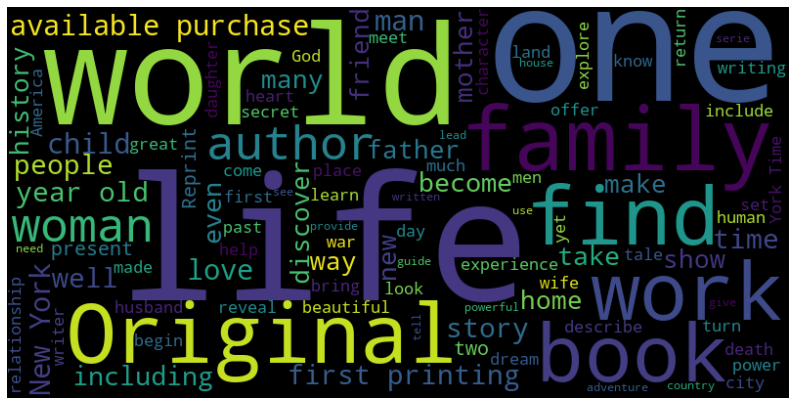

In [107]:
# wordcloud for english books
generate_wordcloud(english_books, 'description', max_words=100, width=800, height=400, min_word_length=3)

In [108]:
# Create a new dataframe with only rows where language is "french"
french_books = books_data[books_data['language'] == "fr"]
french_books.head()

,isbn,book-title,year-of-publication,publisher,image-url-s,authors,published_date,description,page_count,categories,maturity_rating,language
63,2070423204,Lieux dits,2002.0,Gallimard,http://images.amazon.com/images/P/2070423204.01.THUMBZZZ.jpg,[Michel Tournier],2002,"Boire un chocolat chaud ou un vin de Tokay ÃÂ Prague en compagnie de Mozart et Da Ponte, sÃÂ©journer ÃÂ Weimar avec Bach et Goethe, s'envoler pour le Japon, atterrir ÃÂ Bombay, flÃÂ¢ner sur l'ÃÂ®le Saint-Louis, crÃÂ©er un jardin "" de curÃÂ© "", admirer les cerfs-volants ÃÂ Dieppe... Autant de promenades, d'escapades, de voyages ou de rÃÂ©crÃÂ©ations auxquels nous invite Michel Tournier avec une gourmandise, une poÃÂ©sie et un talent jamais dÃÂ©mentis.",126,[Fiction],NOT_MATURE,fr
687,2266084372,Pourquoi j'ai mangÃ?Â© mon pÃ?Â¨re,2000.0,Pocket,http://images.amazon.com/images/P/2266084372.01.THUMBZZZ.jpg,[Roy Lewis],2010-12-02,"Approchez homo sapiens ! Ce livre vous fera hurler de rire ! Faites la connaissance d'une famille prÃÂ©historique : Edouard, le pÃÂ¨re, gÃÂ©nial inventeur qui va changer la face du monde en ramenant le feu ; Vania, l'oncle rÃÂ©ac, ennemi du progrÃÂ¨s ; Erenst, le narrateur, un tantinet benÃÂªt ; Edwige, Griselda et autres ravissantes donzelles... Ces ÃÂªtres dÃÂ©licieux font le monde autour d'un feu en dÃÂ©gustant des os ÃÂ moelle. Regardez-les dÃÂ©couvrir l'amour, s'essayer ÃÂ la drague, se battre avec l'ÃÂ©volution... Situations rocambolesques, personnages hilarants d'un monde oÃÂ¹ l'homme est pourtant dÃÂ©jÃÂ homme : batailleur, jaloux, ingrat et aussi rÃÂ©trograde. Un miroir ÃÂ consulter souvent. Pour rire et rÃÂ©flÃÂ©chir.",182,[],NOT_MATURE,fr
688,2070362388,Ravage,1972.0,Gallimard French,http://images.amazon.com/images/P/2070362388.01.THUMBZZZ.jpg,[RenÃÂ© Barjavel],1972,"De l'autre cÃÂ´tÃÂ© de la Seine une coulÃÂ©e de quintessence enflammÃÂ©e atteint, dans les sous-sols de la caserne de Chaillot, ancien TrocadÃÂ©ro, le dÃÂ©pÃÂ´t de munitions et le laboratoire de recherches des poudres. Une formidable explosion entrouvre la colline. Des pans de murs, des colonnes, des rochers, des tonnes de dÃÂ©bris montent au-dessus du fleuve, retombent sur la foule agenouillÃÂ©e qui rÃÂ¢le son adoration et sa peur fendent les crÃÂ¢nes, arrachent les membres, brisent les os. Un ÃÂ©norme bloc de terre et de ciment aplatit d'un seul coup la moitiÃÂ© des fidÃÂ¨les de la paroisse du Gros-Caillou. En haut de la Tour, un jet de flammes arrache l'ostensoir des mains du prÃÂªtre ÃÂ©pouvantÃÂ©.",313,[Fiction],NOT_MATURE,fr
691,2070417743,Chroniques martiennes,2002.0,Gallimard,http://images.amazon.com/images/P/2070417743.01.THUMBZZZ.jpg,[Ray Bradbury],2001-02-01,Lecture suivie.,318,[Fiction],NOT_MATURE,fr
692,2266033689,Le Diable Au Corps,1990.0,Presses Pocket French,http://images.amazon.com/images/P/2266033689.01.THUMBZZZ.jpg,[Raymond Radiguet],1990,"Pendant la premiÃÂ¨re guerre mondiale, FranÃÂ§ois, un lycÃÂ©en, fait la connaissance de Marthe, une jeune femme de dix-huit ans. Celle-ci est fiancÃÂ©e ÃÂ Jacques, un soldat qui se bat sur le front. Au mÃÂ©pris des commÃÂ©rages, FranÃÂ§ois et Marthe vont devenir amants. Mais FranÃÂ§ois n'est-il pas trop jeune pour s'engager dans une telle liaison ?",206,[],NOT_MATURE,fr


In [109]:
# cleaning of french books desription column
french_books['description'] = french_books['description'].apply(lambda x: clean_description(x, 'french'))
french_books['description'].head()

63                                                                                                                                                                                                                                 Boire chocolat chaud vin Tokay Prague compagnie Mozart Da Ponte journer Weimar Bach Goethe envoler Japon atterrir Bombay fl ner Saint Louis cr er jardin cur admirer cerfs volants Dieppe Autant promenade escapade voyage r cr ations auxquels invite Michel Tournier gourmandise po sie talent jamais mentis
687    Approchez homo sapiens livre fera hurler rire Faites connaissance famille pr historique Edouard p re g nial inventeur va changer face monde ramenant feu Vania oncle r ac ennemi progr Erenst narrateur tantinet ben Edwige Griselda autres ravissantes donzelles tres licieux font monde autour feu gustant o moelle Regardez couvrir amour essayer drague battre volution Situations rocambolesques personnages hilarants monde o homme pourtant homme batailleur jaloux ingr

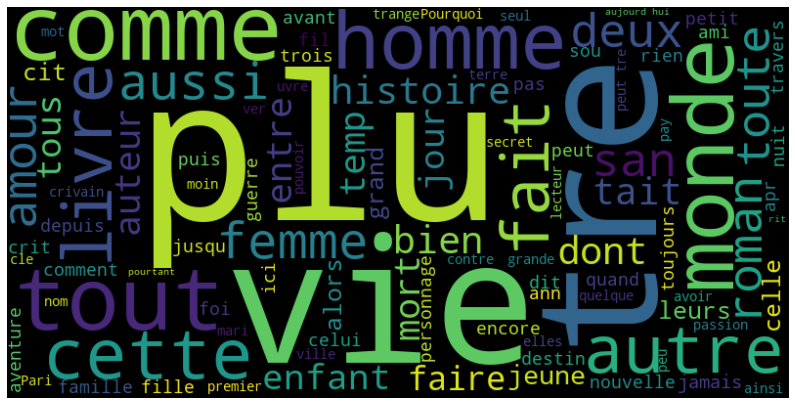

In [110]:
# wordcloud for french books
generate_wordcloud(french_books, 'description', max_words=100, width=800, height=400, min_word_length=3)

In [111]:
# Create a new dataframe with only rows where language is "german"
german_books = books_data[books_data['language'] == "de"]
german_books.head()

,isbn,book-title,year-of-publication,publisher,image-url-s,authors,published_date,description,page_count,categories,maturity_rating,language
33,3442353866,Der Fluch der Kaiserin. Ein Richter- Di- Roman.,2001.0,Goldmann,http://images.amazon.com/images/P/3442353866.01.THUMBZZZ.jpg,"[Eleanor Cooney, Daniel Altieri]",2001-01,Im China des Jahres 671 gelingt Richter Di die Flucht vor der skrupellosen Kaiserin Wu in die Hafenstadt Kanton. Doch auch dort ist er nicht sicher.,507,[],NOT_MATURE,de
34,3442410665,Sturmzeit. Roman.,1991.0,Goldmann,http://images.amazon.com/images/P/3442410665.01.THUMBZZZ.jpg,[Charlotte Link],1991,"Die Erlebnisse der schÃÂ¶nen Felicia, Tochter eines ostpreussischen Gutsbesitzers, in den Jahren 1914 - 1930.",530,[German fiction],NOT_MATURE,de
179,3257208626,Fahrenheit 451,1994.0,Distribooks Inc,http://images.amazon.com/images/P/3257208626.01.THUMBZZZ.jpg,[Ray Bradbury],1981,"'Fahrenheit 451' ist die Temperatur, bei der ""BÃÂ¼cherpapier Feuer fÃÂ¤ngt und verbrennt"". In Ray Bradburys Zukunftsvision ist die Feuerwehr nicht mehr mit Wasserspritzen ausgerÃÂ¼stet, sondern mit Flammenwerfern, die genau diesen Hitzegrad erzeugen, um die letzten Zeugnisse individualistischen Denkens - die BÃÂ¼cher - zu vernichten. Da -beginnt der Feuerwehrmann Guy Montag, sich Fragen zu stellen... Die beÃÂ¤ngstigende Geschichte von einer Welt, in der das BÃÂ¼cherlesen mit GefÃÂ¤ngnis und Tod bestraft wird, ist ein zeitloses PlÃÂ¤doyer fÃÂ¼r das freie Denken.",175,[Fiction],NOT_MATURE,de
187,3257233051,Veronika Deschliesst Zu Sterben / Vernika Decides to Die,2002.0,Distribooks,http://images.amazon.com/images/P/3257233051.01.THUMBZZZ.jpg,[Paulo Coelho],2002-01,"Die Geschichte einer unglÃÂ¼cklichen jungen Frau, die sterben will und erst angesichts des Todes entdeckt, wie schÃÂ¶n das Leben sein kann, wenn man darum kÃÂ¤mpft und etwas riskiert. Ein wunderbares Buch ÃÂ¼ber die Prise 'VerrÃÂ¼cktheit', die es braucht, um den eigenen Lebenstraum Wirklichkeit werden zu lassen, und eine groÃÂe LiebeserklÃÂ¤rung an das GlÃÂ¼ck in jedem von uns.",223,[Fiction],NOT_MATURE,de
190,3423241489,Ist mein Hintern wirklich so dick? Tagebuch einer empfindsamen Frau.,1998.0,Dtv,http://images.amazon.com/images/P/3423241489.01.THUMBZZZ.jpg,[Arabella Weir],1998,"Jacqueline er en dygtig 35-ÃÂ¥rig kvinde, som passer sit job som konferenceplanlÃÂ¦gger i London med stor succes. Men i sin dagbog afslÃÂ¸rer hun galgenhumoristisk sit rÃÂ¦dselsfulde mindrevÃÂ¦rdskompleks og sin absolut skÃÂ¦ve selvopfattelse",239,[],NOT_MATURE,de


In [112]:
# cleaning of german books desription column
german_books['description'] = german_books['description'].apply(lambda x: clean_description(x, 'german'))
german_books['description'].head()

33                                                                                                                                                                                                                                                                                                         China Jahres gelingt Richter Di Flucht skrupellosen Kaiserin Wu Hafenstadt Kanton sicher
34                                                                                                                                                                                                                                                                                                                          Erlebnisse sch nen Felicia Tochter ostpreussischen Gutsbesitzers Jahren
179    Fahrenheit Temperatur B cherpapier Feuer f ngt verbrennt Ray Bradburys Zukunftsvision Feuerwehr mehr Wasserspritzen ausger stet Flammenwerfern genau Hitzegrad erzeugen letzten Zeugnisse individualistischen Denkens B c

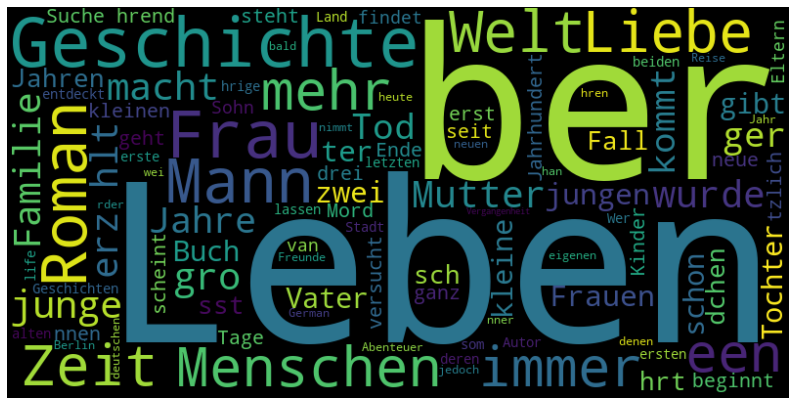

In [113]:
# wordcloud for german books
generate_wordcloud(german_books, 'description', max_words=100, width=800, height=400, min_word_length=3)

In [114]:
books_data.isna().sum()

isbn                    0
book-title              0
year-of-publication     0
publisher               0
image-url-s             0
authors                 0
published_date         14
description             0
page_count              0
categories              0
maturity_rating         0
language                0
dtype: int64

In [115]:
books_data.isna().sum()

isbn                    0
book-title              0
year-of-publication     0
publisher               0
image-url-s             0
authors                 0
published_date         14
description             0
page_count              0
categories              0
maturity_rating         0
language                0
dtype: int64

> Merge all 3 dataset into one

In [116]:
# merging ratings and books_data

rt_books = pd.merge(ratings, books_data, on='isbn', how='inner')
rt_books.head()

,user-id,isbn,book-rating,book-title,year-of-publication,publisher,image-url-s,authors,published_date,description,page_count,categories,maturity_rating,language
0,276729,052165615X,3,Help!: Level 1,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.01.THUMBZZZ.jpg,[Philip Prowse],1999-04,"Things appear to be looking up for Frank Wormold when a Hollywood producer offers to buy one of his stories, but when the computer he is using to finish the story starts to take over, the unsuccessful writer's troubles are just beginning.",36,[Foreign Language Study],NOT_MATURE,en
1,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.01.THUMBZZZ.jpg,[Sue Leather],2001-02-22,"Modern, original fiction for learners of English. Journalist Kate Jensen is shocked when her friend Max is found murdered in Amsterdam. She goes there to search for her friend's killer and starts asking questions at the football club he owned. It soon becomes clear that someone doesn't want her to get any answers and Kate discovers that football can be a very dangerous game indeed.",84,[Fiction],NOT_MATURE,en
2,276733,2080674722,0,Les Particules Elementaires,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.01.THUMBZZZ.jpg,[Michel Houellebecq],1998,Analyse : Roman Ã©rotique. Roman de sociÃ©tÃ©.,408,[Brothers],NOT_MATURE,fr
3,192101,2080674722,7,Les Particules Elementaires,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.01.THUMBZZZ.jpg,[Michel Houellebecq],1998,Analyse : Roman Ã©rotique. Roman de sociÃ©tÃ©.,408,[Brothers],NOT_MATURE,fr
4,201170,2080674722,4,Les Particules Elementaires,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.01.THUMBZZZ.jpg,[Michel Houellebecq],1998,Analyse : Roman Ã©rotique. Roman de sociÃ©tÃ©.,408,[Brothers],NOT_MATURE,fr


In [117]:
rt_books.isna().sum()

user-id                 0
isbn                    0
book-rating             0
book-title              0
year-of-publication     0
publisher               0
image-url-s             0
authors                 0
published_date         99
description             0
page_count              0
categories              0
maturity_rating         0
language                0
dtype: int64

In [118]:
users.head()

,user-id,age,city,state,country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom


In [119]:
# merging rt_books and users

library=pd.merge(rt_books, users, on='user-id', how='inner')
library.head()

,user-id,isbn,book-rating,book-title,year-of-publication,publisher,image-url-s,authors,published_date,description,page_count,categories,maturity_rating,language,age,city,state,country
0,276729,052165615X,3,Help!: Level 1,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.01.THUMBZZZ.jpg,[Philip Prowse],1999-04,"Things appear to be looking up for Frank Wormold when a Hollywood producer offers to buy one of his stories, but when the computer he is using to finish the story starts to take over, the unsuccessful writer's troubles are just beginning.",36,[Foreign Language Study],NOT_MATURE,en,16,rijeka,other,croatia
1,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.01.THUMBZZZ.jpg,[Sue Leather],2001-02-22,"Modern, original fiction for learners of English. Journalist Kate Jensen is shocked when her friend Max is found murdered in Amsterdam. She goes there to search for her friend's killer and starts asking questions at the football club he owned. It soon becomes clear that someone doesn't want her to get any answers and Kate discovers that football can be a very dangerous game indeed.",84,[Fiction],NOT_MATURE,en,16,rijeka,other,croatia
2,276733,2080674722,0,Les Particules Elementaires,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.01.THUMBZZZ.jpg,[Michel Houellebecq],1998,Analyse : Roman Ã©rotique. Roman de sociÃ©tÃ©.,408,[Brothers],NOT_MATURE,fr,37,paris,other,france
3,192101,2080674722,7,Les Particules Elementaires,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.01.THUMBZZZ.jpg,[Michel Houellebecq],1998,Analyse : Roman Ã©rotique. Roman de sociÃ©tÃ©.,408,[Brothers],NOT_MATURE,fr,29,paris,ile de france,france
4,192101,9871138016,0,Cronica De Una Muerte Anunciada,2002.0,Debols!llo,http://images.amazon.com/images/P/9871138016.01.THUMBZZZ.jpg,[Gabriel GarcÃÂ­a MÃÂ¡rquez],2003,"Acaso sea 'CrÃÂ³nica de una muerte anunciada' la obra mÃÂ¡s 'realista' de Gabriel GarcÃÂ­a MÃÂ¡rquez, pues se basa en un hecho histÃÂ³rico acontecido en la tierra natal de escritor. Cuando empieza la novela, ya se saber que los hermanos Vicario van a matara a Santiago Nasar - de hecho ya le han matado- para vengar el honor ultrajado de su hermana ÃÂngela, pero el relato termina precisamente en el momento en que Santiago Nasar. El tiempo cÃÂ­clico, tan utilizado por GarcÃÂ­a MÃÂ¡rquez en sus obras, reaparece aquÃÂ­ minuciosamente descompuesto en cada uno de sus momentos, reconstruido prolija y exactamente por el narrador, que va dando cuenta de lo que sucediÃÂ³ mucho tiempo atrÃÂ¡s, que avanza y retrocede en su relato y hasta llega mucho tiempo despuÃÂ©s para contar el destino de los supervivientes.",137,[Colombian fiction],NOT_MATURE,es,29,paris,ile de france,france


In [120]:
library.isna().sum()

user-id                 0
isbn                    0
book-rating             0
book-title              0
year-of-publication     0
publisher               0
image-url-s             0
authors                 0
published_date         99
description             0
page_count              0
categories              0
maturity_rating         0
language                0
age                     0
city                    0
state                   0
country                 0
dtype: int64

In [121]:
library.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790700 entries, 0 to 790699
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user-id              790700 non-null  int64  
 1   isbn                 790700 non-null  object 
 2   book-rating          790700 non-null  int64  
 3   book-title           790700 non-null  object 
 4   year-of-publication  790700 non-null  float64
 5   publisher            790700 non-null  object 
 6   image-url-s          790700 non-null  object 
 7   authors              790700 non-null  object 
 8   published_date       790601 non-null  object 
 9   description          790700 non-null  object 
 10  page_count           790700 non-null  int32  
 11  categories           790700 non-null  object 
 12  maturity_rating      790700 non-null  object 
 13  language             790700 non-null  object 
 14  age                  790700 non-null  int8   
 15  city             

In [122]:
# drop published_date
books_data.drop('published_date', axis=1, inplace=True)